We're going to make a map like *this* for jogl's programs.

I am lazy so I won't read their API Docs. Here are the urls I found thanks to dev console:

- https://jogl-backend.herokuapp.com/api/programs 

- https://jogl-backend.herokuapp.com/api/projects/155

You can get the list of project IDs from the jogl's page. In dev console:

```js
Object.values(document
    .querySelectorAll('.cardProject > a'))
    .map((link) => /project\/(\d+)$/.exec(link.href)[1])
    .map((id) => `https://jogl-backend.herokuapp.com/api/projects/${id}`)
```

And here goes the magic list:

In [1]:
PROJECTS = [
  "https://jogl-backend.herokuapp.com/api/projects/148",
  "https://jogl-backend.herokuapp.com/api/projects/149",
  "https://jogl-backend.herokuapp.com/api/projects/137",
  "https://jogl-backend.herokuapp.com/api/projects/130",
  "https://jogl-backend.herokuapp.com/api/projects/140",
  "https://jogl-backend.herokuapp.com/api/projects/133",
  "https://jogl-backend.herokuapp.com/api/projects/150",
  "https://jogl-backend.herokuapp.com/api/projects/158",
  "https://jogl-backend.herokuapp.com/api/projects/146",
  "https://jogl-backend.herokuapp.com/api/projects/155",
  "https://jogl-backend.herokuapp.com/api/projects/161",
  "https://jogl-backend.herokuapp.com/api/projects/145",
  "https://jogl-backend.herokuapp.com/api/projects/144",
  "https://jogl-backend.herokuapp.com/api/projects/136",
  "https://jogl-backend.herokuapp.com/api/projects/147",
  "https://jogl-backend.herokuapp.com/api/projects/148",
  "https://jogl-backend.herokuapp.com/api/projects/149",
  "https://jogl-backend.herokuapp.com/api/projects/137",
  "https://jogl-backend.herokuapp.com/api/projects/130",
  "https://jogl-backend.herokuapp.com/api/projects/140",
  "https://jogl-backend.herokuapp.com/api/projects/133",
  "https://jogl-backend.herokuapp.com/api/projects/150",
  "https://jogl-backend.herokuapp.com/api/projects/158",
  "https://jogl-backend.herokuapp.com/api/projects/146",
  "https://jogl-backend.herokuapp.com/api/projects/155",
  "https://jogl-backend.herokuapp.com/api/projects/161",
  "https://jogl-backend.herokuapp.com/api/projects/145",
  "https://jogl-backend.herokuapp.com/api/projects/144",
  "https://jogl-backend.herokuapp.com/api/projects/136",
  "https://jogl-backend.herokuapp.com/api/projects/147",
]

I'm going to use welearn's doc2vec api to get wikipedia pages similar to the projects. Then we'll transform all the data we get into a json file for the map visualization. [1]


[1]: Schema for the json is documented [here](https://welearn.cri-paris.org/.meta/docs#/resources/list_bot_resources_api_resources_bot__bot_email__get)


In [37]:
import requests
import json
from pprint import pprint
from pyquery import PyQuery as pq

TEXTRACT_URL = 'https://welearn.cri-paris.org/textract/infer/text'

def text2Wiki(text, lang='en'):
  '''Get the wikipedia pages for `text`.'''
  try:
    return requests.get(TEXTRACT_URL, params={'text': text, 'lang': lang}).json()
  except Exception:
    return []



{'https://jogl-backend.herokuapp.com/api/projects/130': {'address': None,
                                                         'banner_url': '',
                                                         'banner_url_sm': '',
                                                         'challenges': [{'banner_url': None,
                                                                         'id': 5,
                                                                         'short_description': 'Research '
                                                                                              'and '
                                                                                              'develop '
                                                                                              'open-source '
                                                                                              'and '
                                                                            

                                                                                  'Prevention',
                                                                         'title_fr': 'Prévention '
                                                                                     'du '
                                                                                     'Covid19'}],
                                                         'city': None,
                                                         'claps_count': 3,
                                                         'country': None,
                                                         'creator': {'first_name': 'Pascal',
                                                                     'id': 2346,
                                                                     'last_name': 'Piazzalunga',
                                                                     'logo_url': 'https://jogl-backend.herokuapp.com/rails/ac
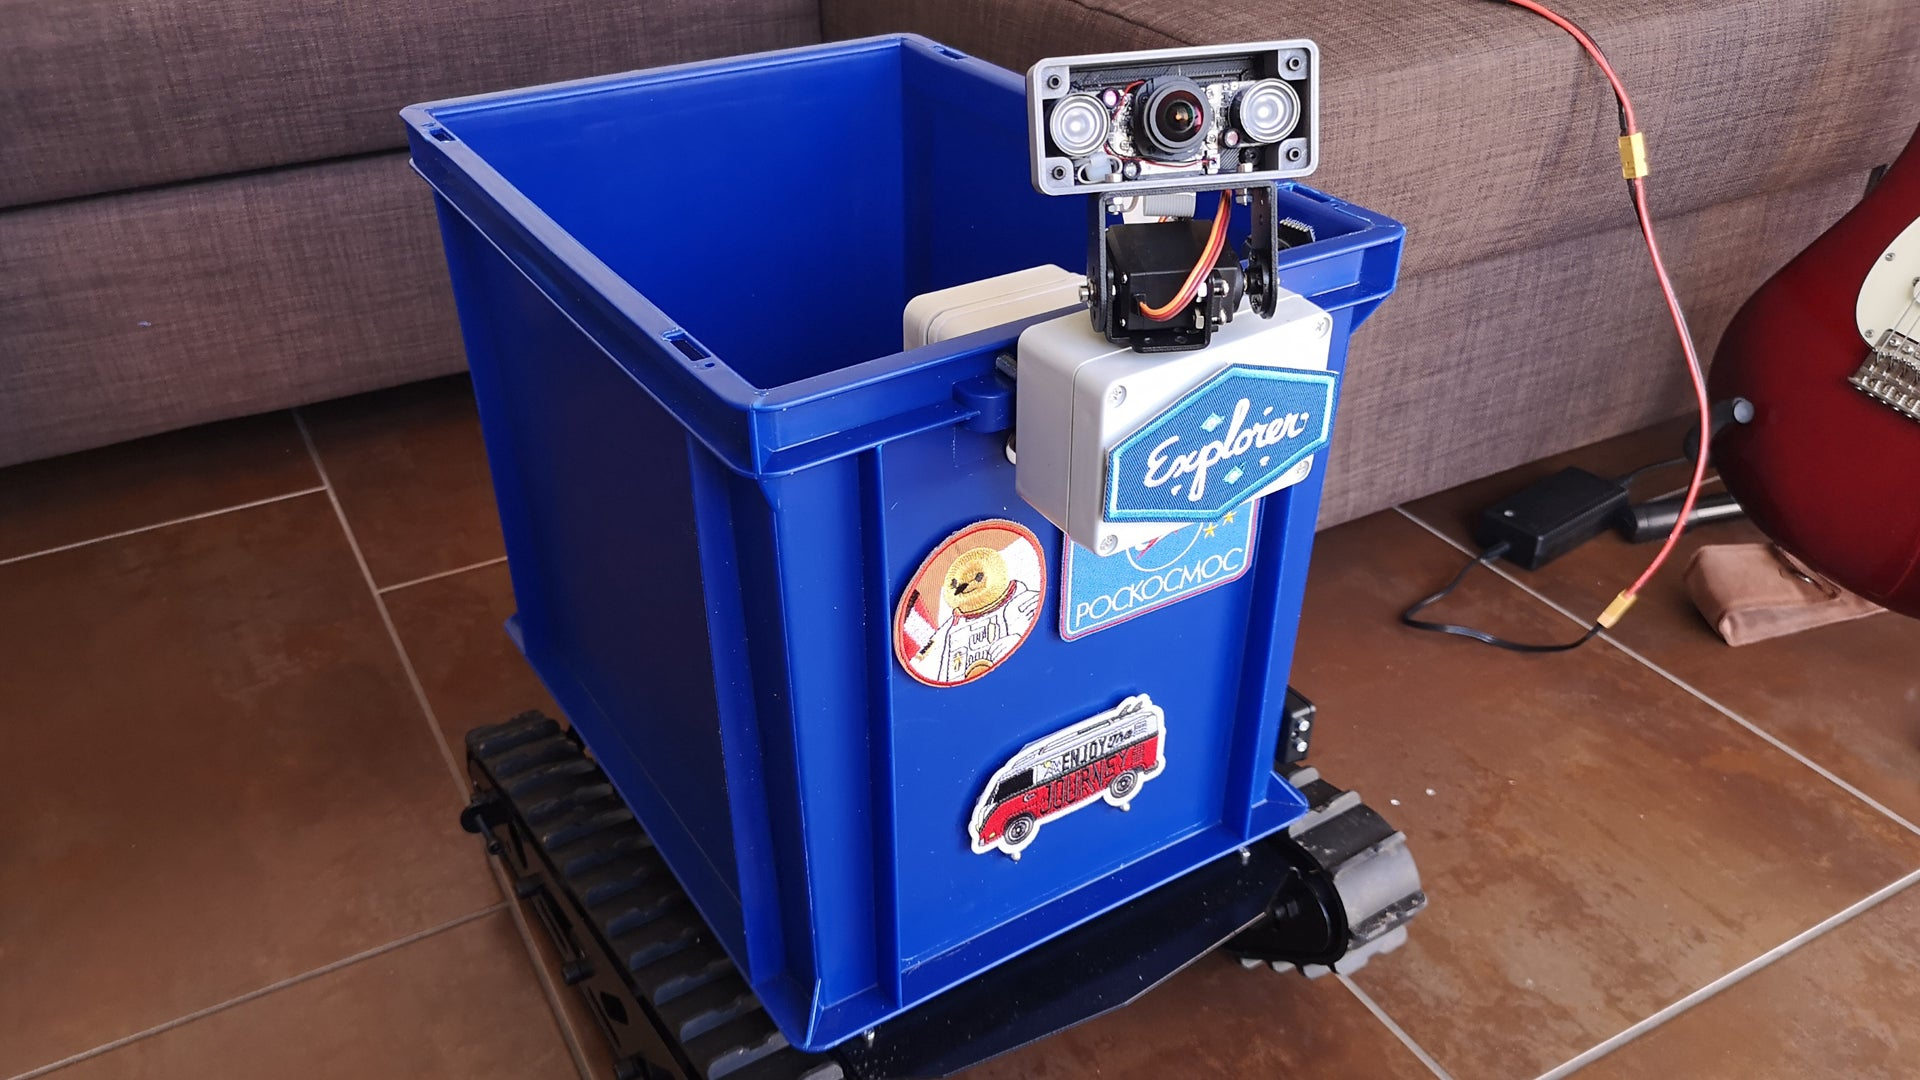
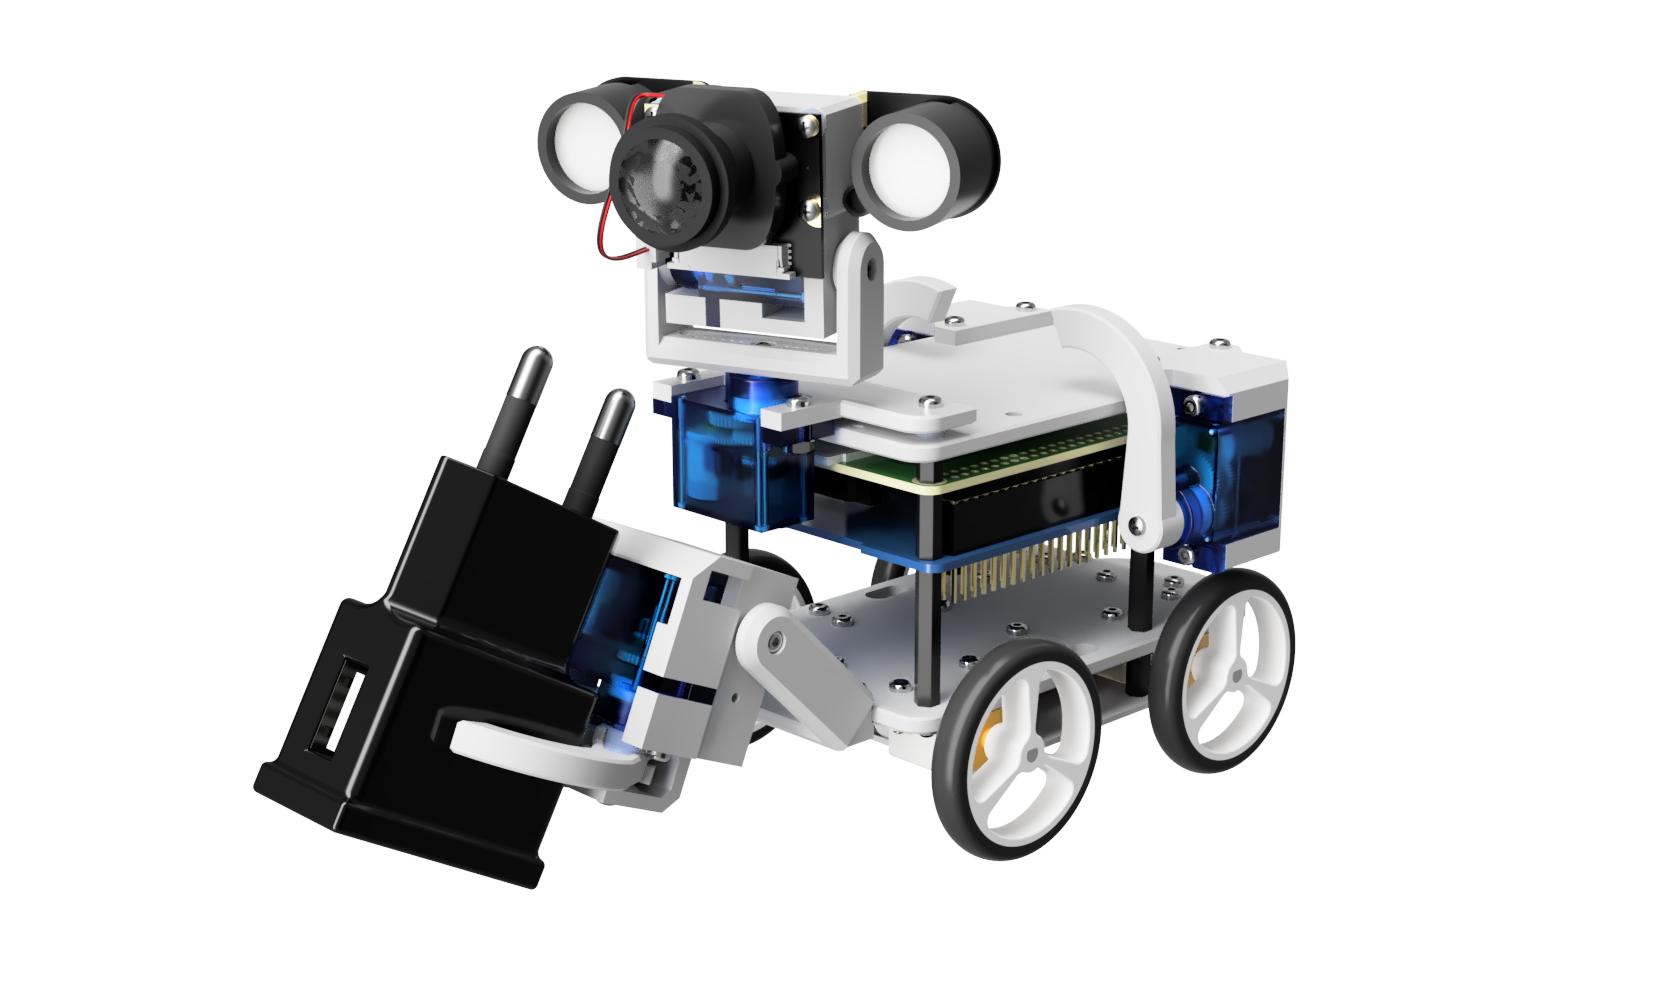
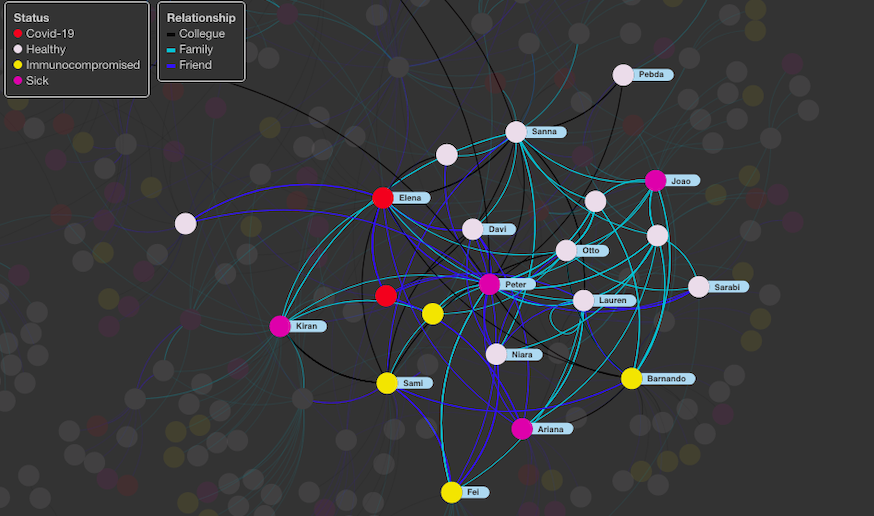

                                                                        'put '
                                                                        'here '
                                                                        'some '
                                                                        'links '
                                                                        'from '
                                                                        'the '
                                                                        'project '
                                                                        'and '
                                                                        'existing '
                                                                        'materials\xa0'
                                                                        '</p><p>https://github.com/Co-Epi</p><p>https://www.coepi.org/collaborations '
                                    

                                                                                'for '
                                                                                'the '
                                                                                'survival '
                                                                                'of '
                                                                                'many '
                                                                                'countries. '
                                                                                '</span></p><p><span '
                                                                                'style="background-color: '
                                                                                'initial; '
                                                                                'color: '
                                                                         

                                                                         'title': 'Covid19 '
                                                                                  'Prevention',
                                                                         'title_fr': 'Prévention '
                                                                                     'du '
                                                                                     'Covid19'}],
                                                         'city': None,
                                                         'claps_count': 1,
                                                         'country': None,
                                                         'creator': {'first_name': 'Anteneh',
                                                                     'id': 2997,
                                                                     'last_name': 'Gashaw',
                                    

                                                                        'are '
                                                                        'newly '
                                                                        'manufactured '
                                                                        'and '
                                                                        'possibly '
                                                                        'the '
                                                                        'existing '
                                                                        'products. '
                                                                        'This '
                                                                        'will '
                                                                        'be '
                                                                        'very '
                       

                                                         'members_count': 1,
                                                         'needs_count': 0,
                                                         'short_description': 'Smart '
                                                                              'coaster '
                                                                              'placed '
                                                                              'at '
                                                                              'bottom '
                                                                              'of '
                                                                              'a '
                                                                              'bottle/cup '
                                                                              'holding '
                                                                

                                                                        'when '
                                                                        'the '
                                                                        'immune '
                                                                        'and '
                                                                        'recovered '
                                                                        'people '
                                                                        'decide '
                                                                        'to go '
                                                                        'to '
                                                                        'work '
                                                                        'because '
                                                                        'for '
                              

In [22]:
# fetch all the projs

projs = {url: requests.get(url).json() for url in PROJECTS}

pprint(projs)

In [26]:
projs['https://jogl-backend.herokuapp.com/api/projects/130'].keys()

dict_keys(['id', 'title', 'short_title', 'banner_url', 'banner_url_sm', 'short_description', 'creator', 'status', 'skills', 'interests', 'documents', 'documents_feed', 'geoloc', 'country', 'city', 'address', 'feed_id', 'is_private', 'challenges', 'users_sm', 'is_owner', 'is_admin', 'is_member', 'has_clapped', 'has_followed', 'claps_count', 'follower_count', 'members_count', 'needs_count', 'desc_elevator_pitch', 'desc_problem_statement', 'desc_objectives', 'desc_state_art', 'desc_progress', 'desc_stakeholder', 'desc_impact_strat', 'desc_ethical_statement', 'desc_sustainability_scalability', 'desc_communication_strat', 'desc_funding', 'desc_contributing', 'description'])

In [35]:
def as_resource(url, p):
  # assume english.
  return {
    'id': p['id'],
    'title': p['title'],
    'concepts': text2Wiki(p['description'], 'en'),
    'lang': 'en',
    'url': url,
    'type': 'bot',
  }

resources = [as_resource(url, p) for url, p in projs.items()]

In [36]:
resources

[{'id': 148,
  'title': 'Integrated resource allocat VS COVID-19',
  'concepts': [{'wikidata_id': 'Q6059927',
    'lang': 'en',
    'similarity_score': 0.545,
    'title': 'Inventory management software',
    'title_en': 'Inventory management software',
    'title_fr': None,
    'title_es': None},
   {'wikidata_id': 'Q1519812',
    'lang': 'en',
    'similarity_score': 0.522,
    'title': 'Health policy',
    'title_en': 'Health policy',
    'title_fr': None,
    'title_es': None},
   {'wikidata_id': 'Q1229911',
    'lang': 'en',
    'similarity_score': 0.52,
    'title': 'Food security',
    'title_en': 'Food security',
    'title_fr': None,
    'title_es': None},
   {'wikidata_id': 'Q6899031',
    'lang': 'en',
    'similarity_score': 0.513,
    'title': 'Monetization of U.S. in-kind food aid',
    'title_en': 'Monetization of U.S. in-kind food aid',
    'title_fr': None,
    'title_es': None}],
  'lang': 'en',
  'url': 'https://jogl-backend.herokuapp.com/api/projects/148',
  'type':

The performance isnt that great, but let's see what happens.

I export a json and put it in my s3 bucket.

In [38]:
with open('jogl-projects-map.json', 'w') as fp:
  atlas = {
    'results': resources,
    'pagination': {
      'count': len(resources),
      'limit': len(resources),
      'skip': 0,
    },
  }
  json.dump(atlas, fp, ensure_ascii=False)

And, here we go:

[The Map](https://deploy-preview-149--welearn-dev.netlify.com/pages/discover.html?cset=Q192060,Q42240,Q1060990,Q1067402&lid=nothing&src=https://noop-pub.s3.amazonaws.com/opt/jogl-projects-map.json).

It's not great, but that's fixable. Check out the [Covid Map Here](https://deploy-preview-149--welearn-dev.netlify.com/pages/discover.html?cset=Q1142055,Q355,Q22696,Q3002982,Q903872,Q3652617,Q181790,Q263125,Q213901,Q2914873,Q2628236,Q380775&lid=covid19%40noop.pw&src=%2Fapi%2Fresources%2Fbot%2Fcovid19%40noop.pw) too!